In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [175]:
data=pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [176]:
data.shape

(1000, 40)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [178]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [180]:
data = data.replace('?',np.NaN)

data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [181]:
data=data.drop(['_c39'],axis=1)

In [182]:
# we will replace the '?' by the most common collision type as we are unaware of the type.
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)


In [183]:
data['property_damage'].fillna('NO', inplace = True)

In [184]:
data['police_report_available'].fillna('NO', inplace = True)

data.isnull().any().any()

False

In [185]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [186]:
data=data.fillna(data.mean())

In [187]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

As there are no null values lets proceed to another step

In [188]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Divinding categorical and continuous columns

In [189]:
s = (data.dtypes == 'object')
cate_cols = list(s[s].index)

s = (data.dtypes == 'int64')
cont_cols = list(s[s].index)

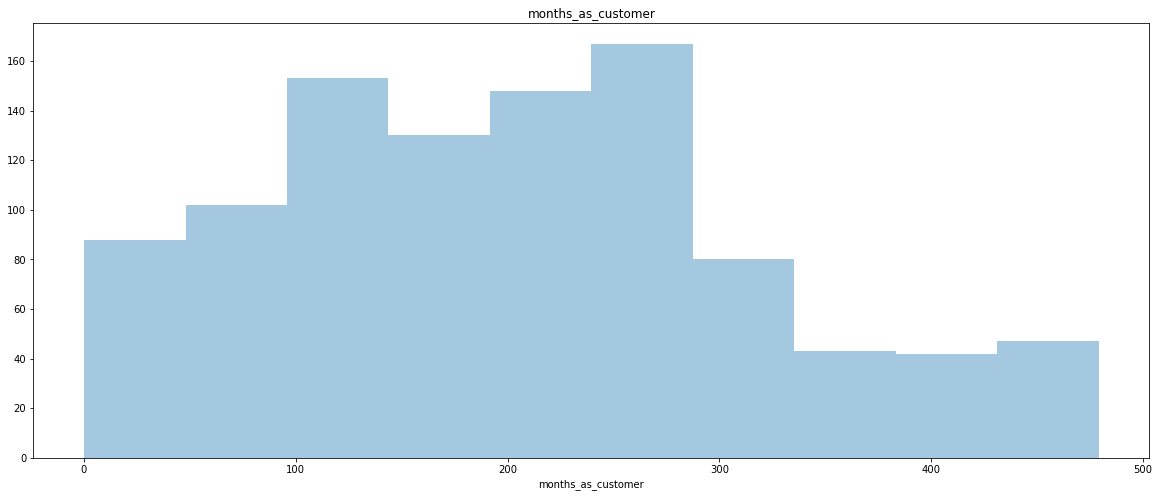

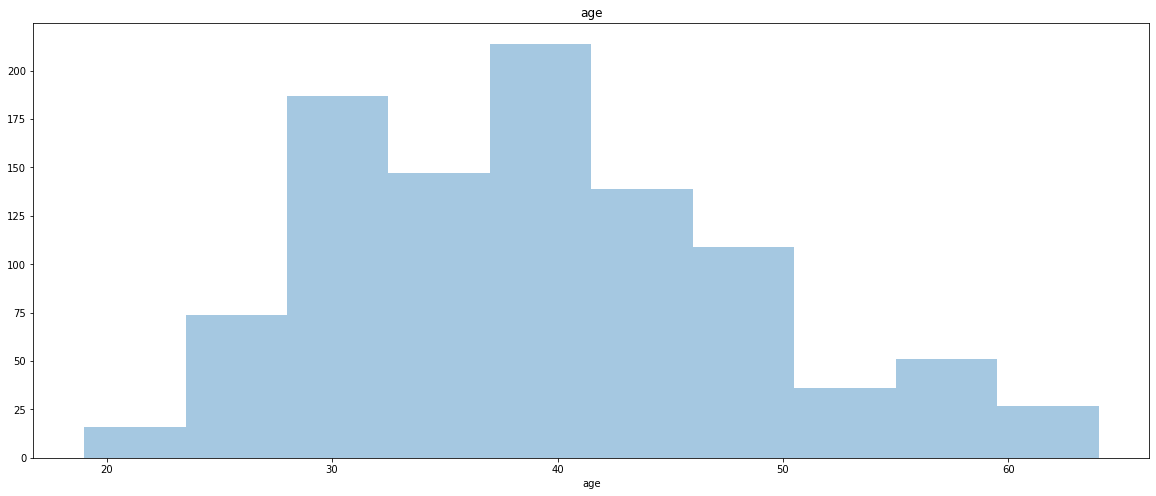

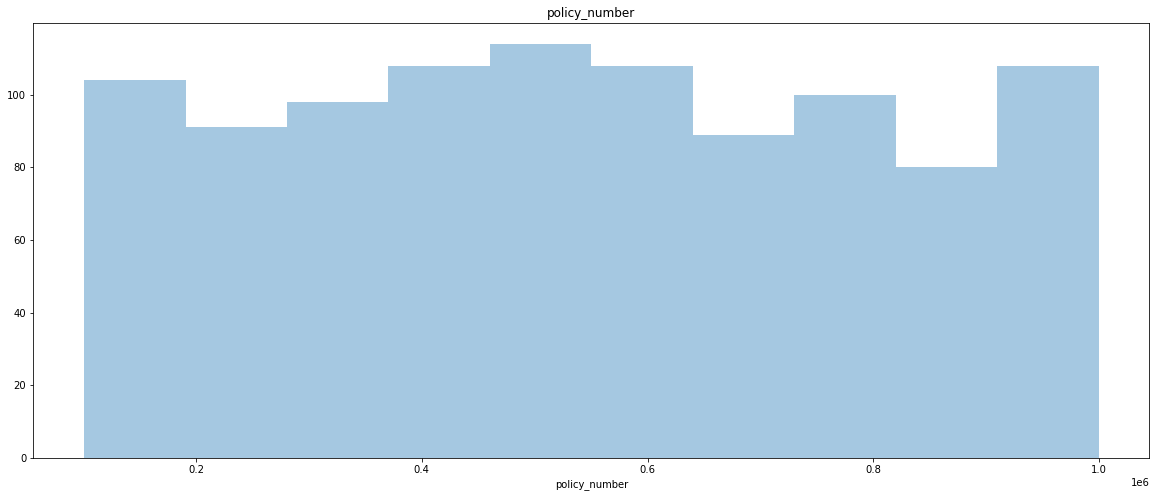

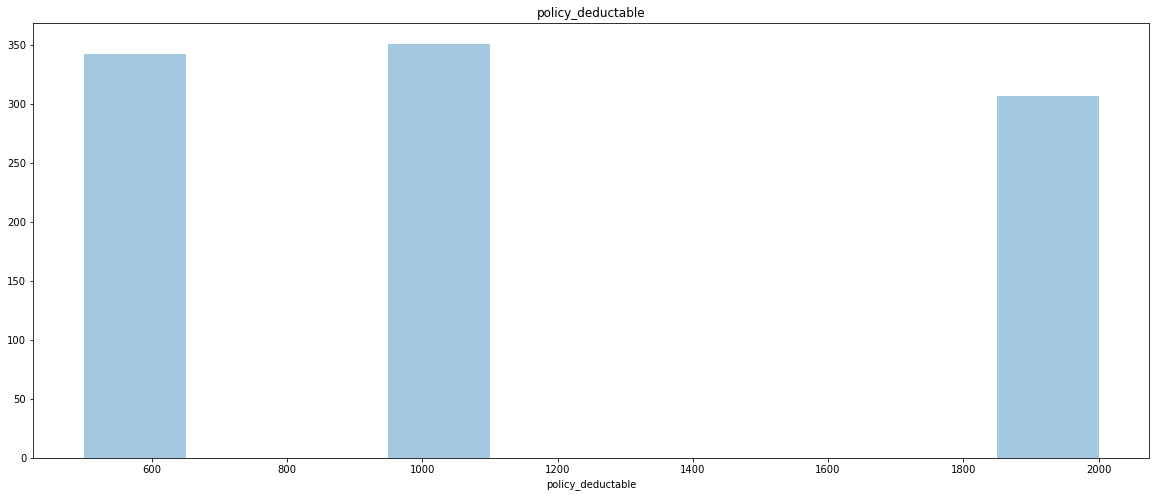

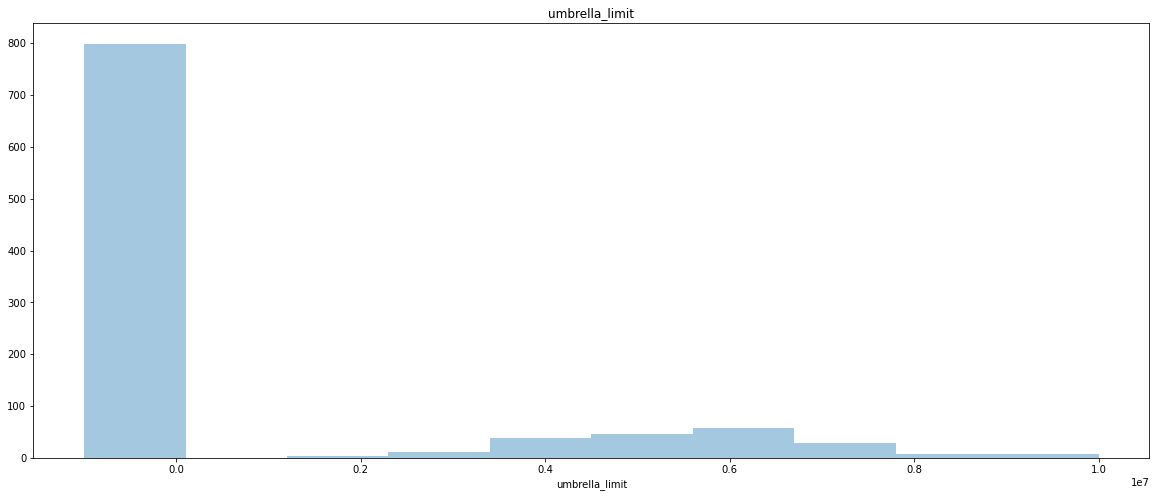

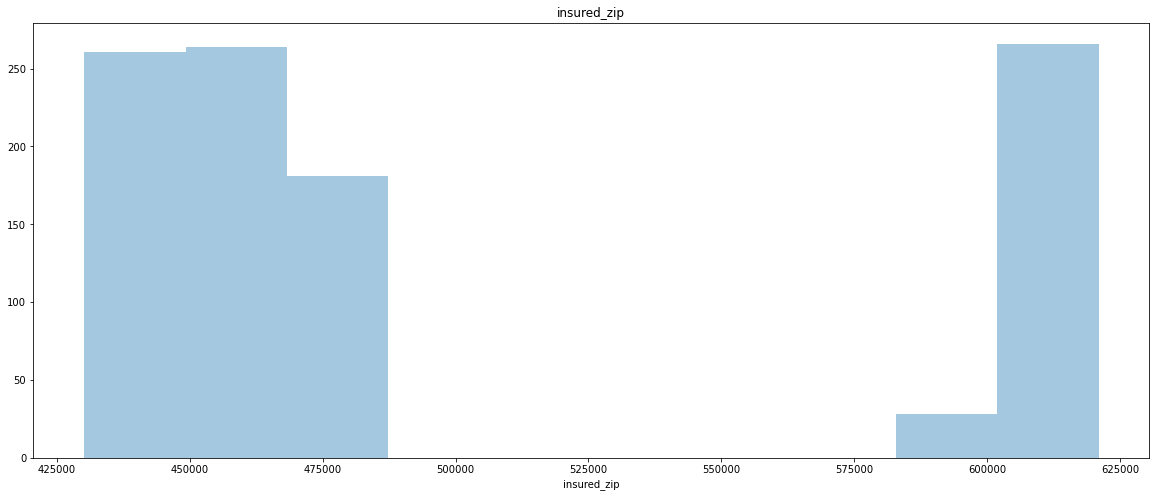

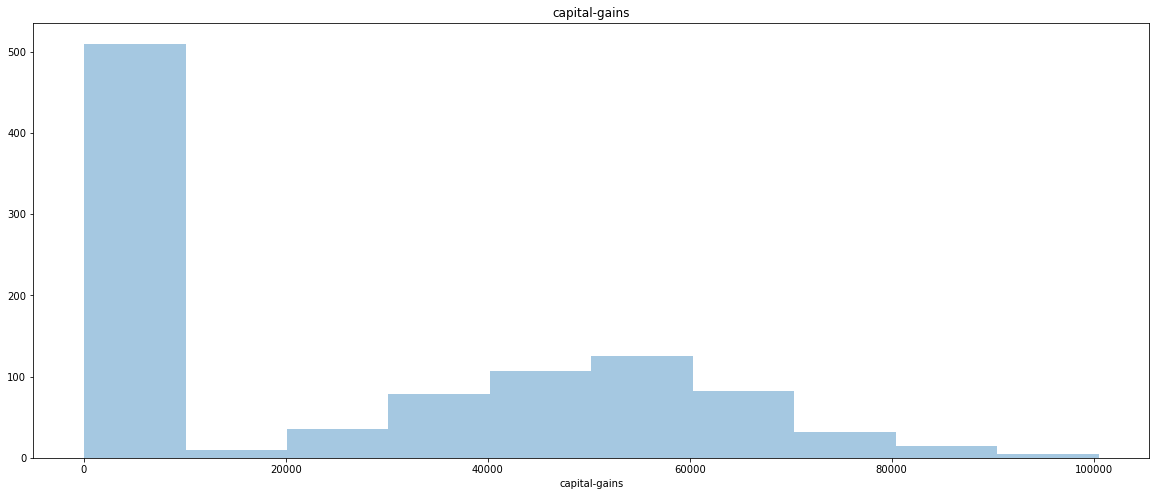

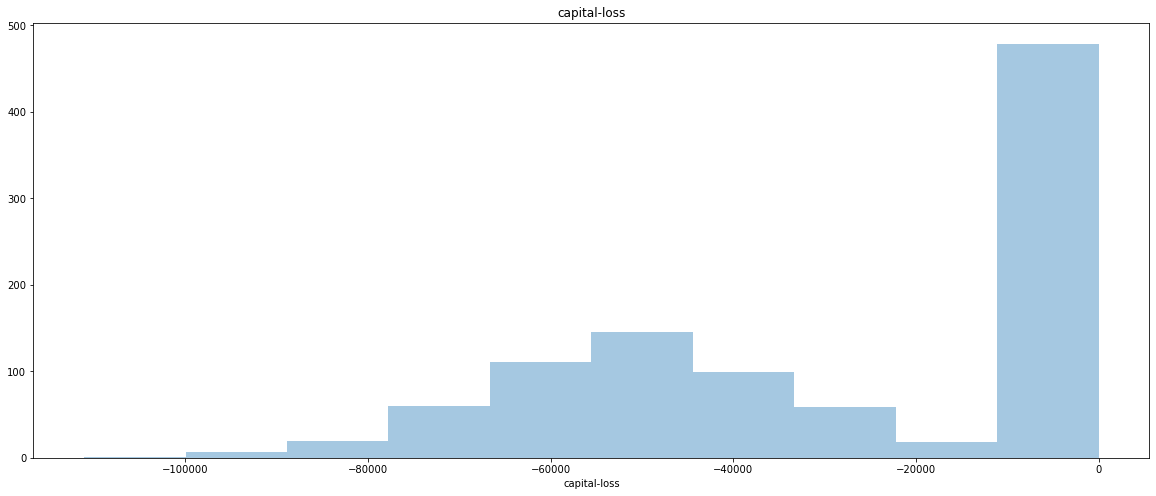

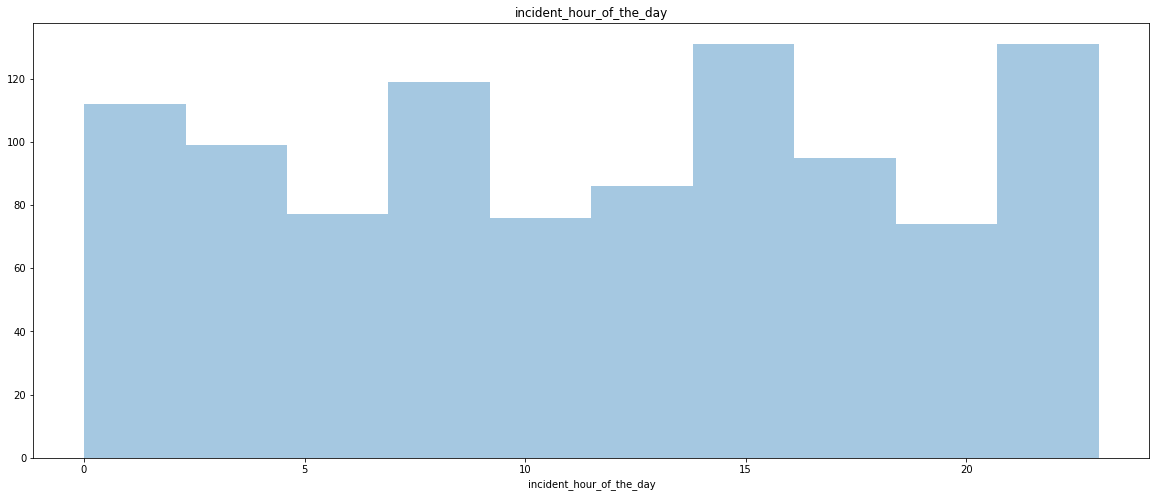

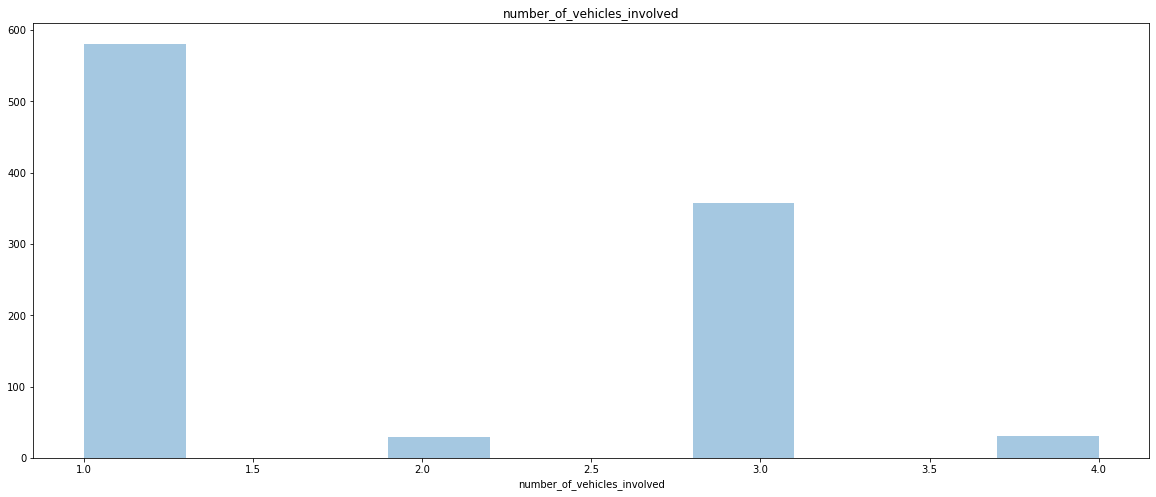

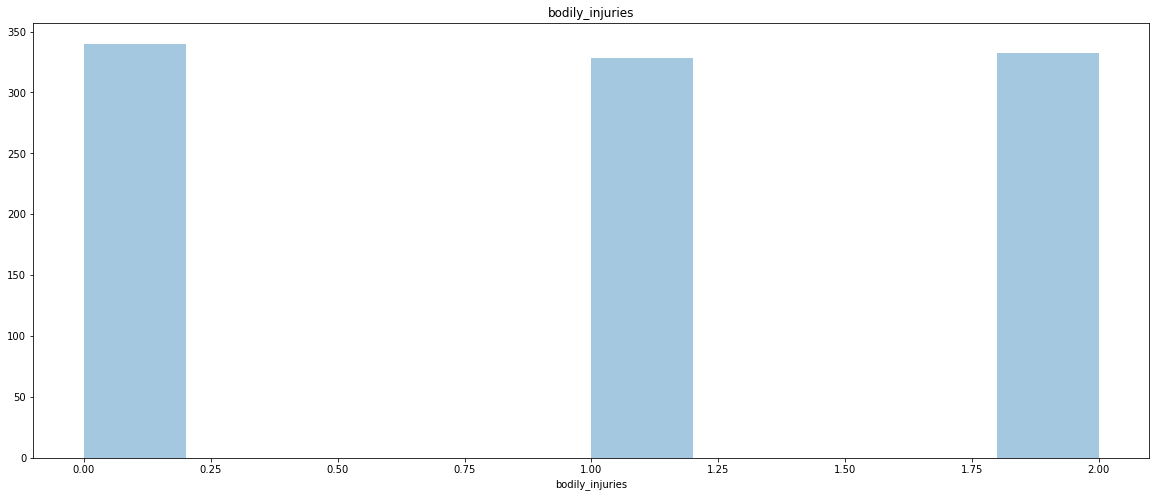

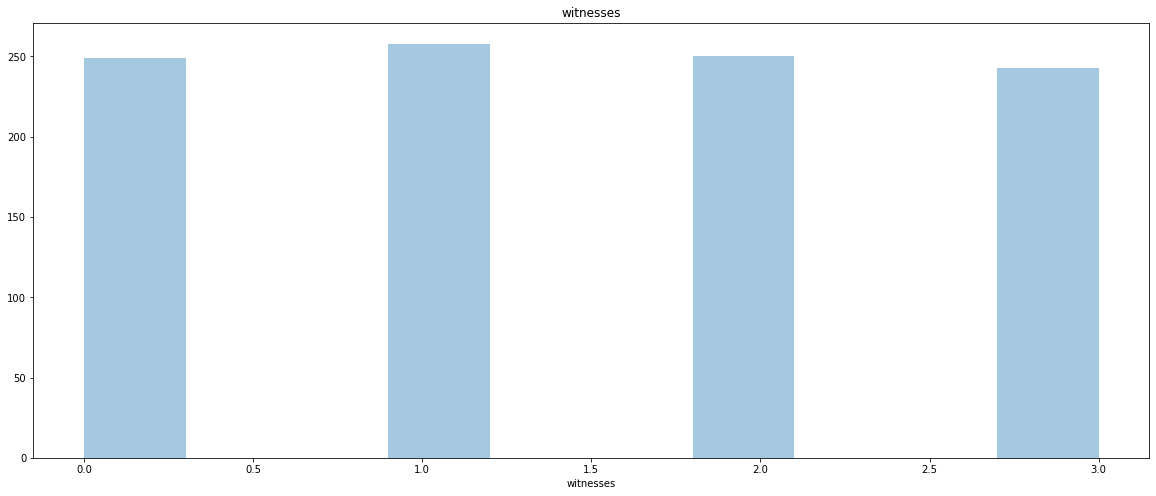

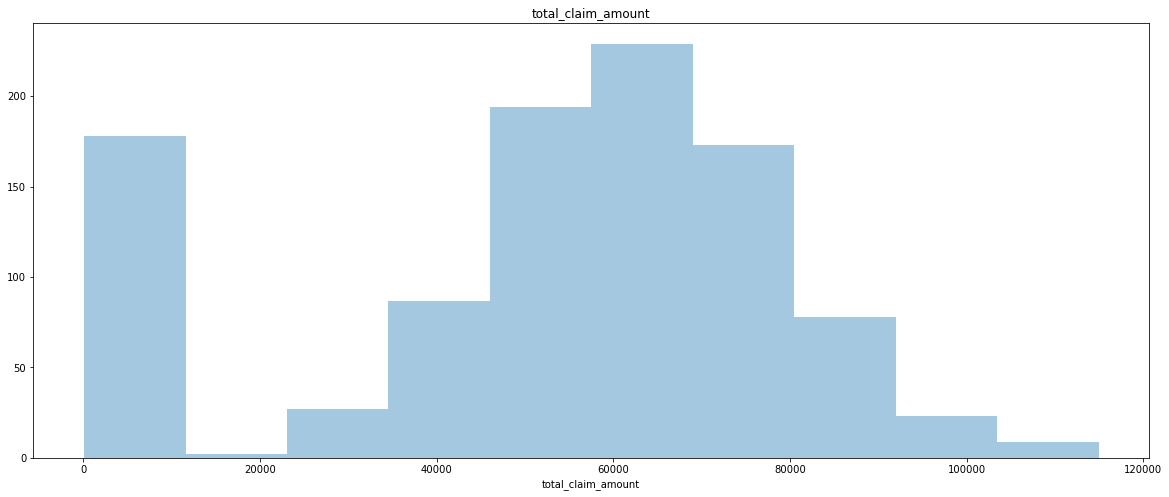

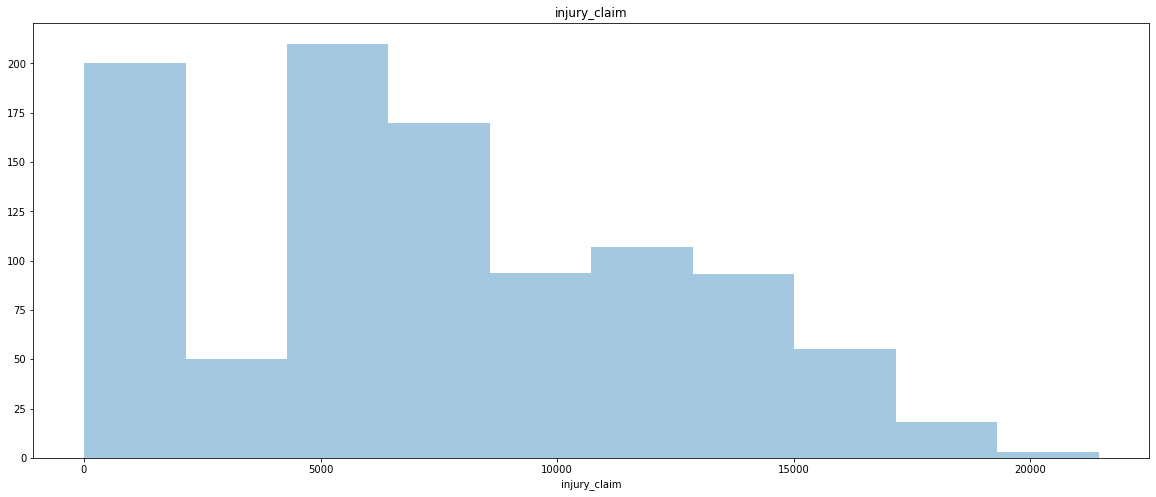

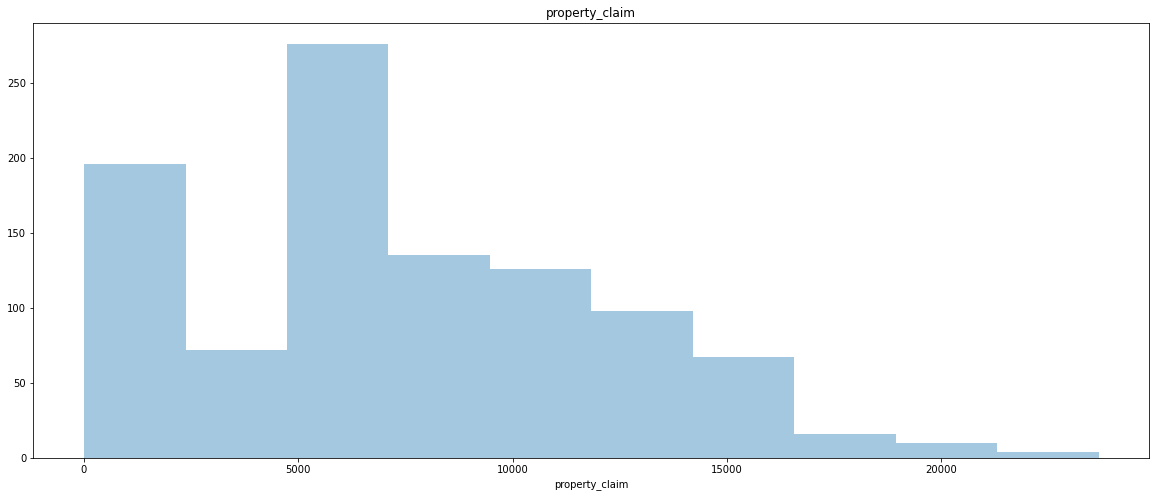

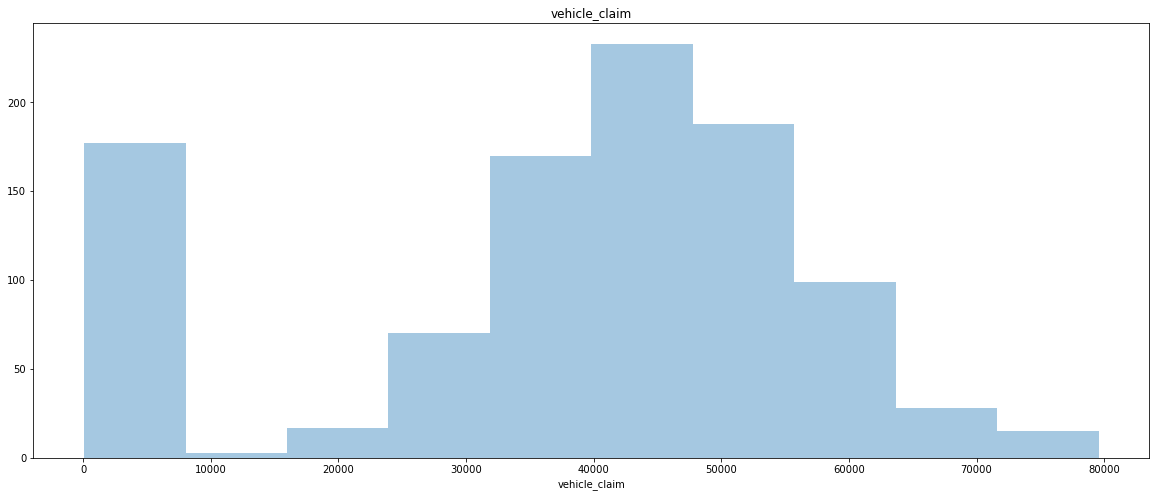

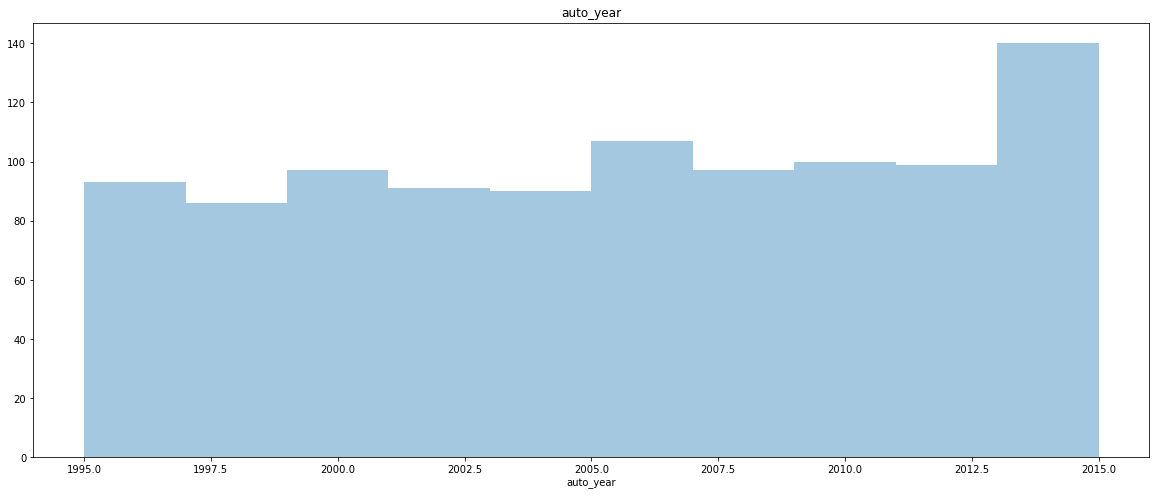

In [148]:
for i in cont_cols:                                
    plt.figure(figsize = (20, 8))
    sns.distplot(a= data[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

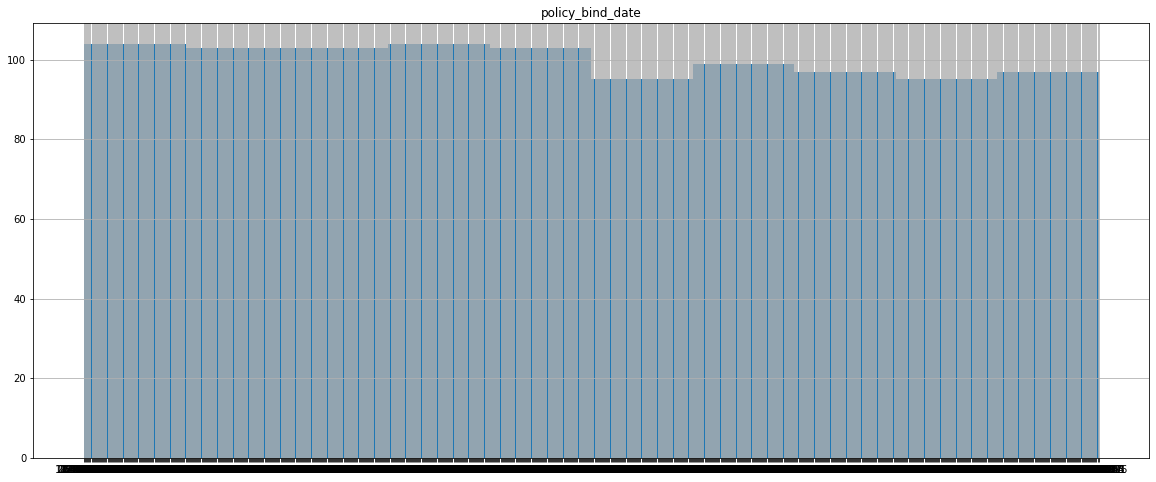

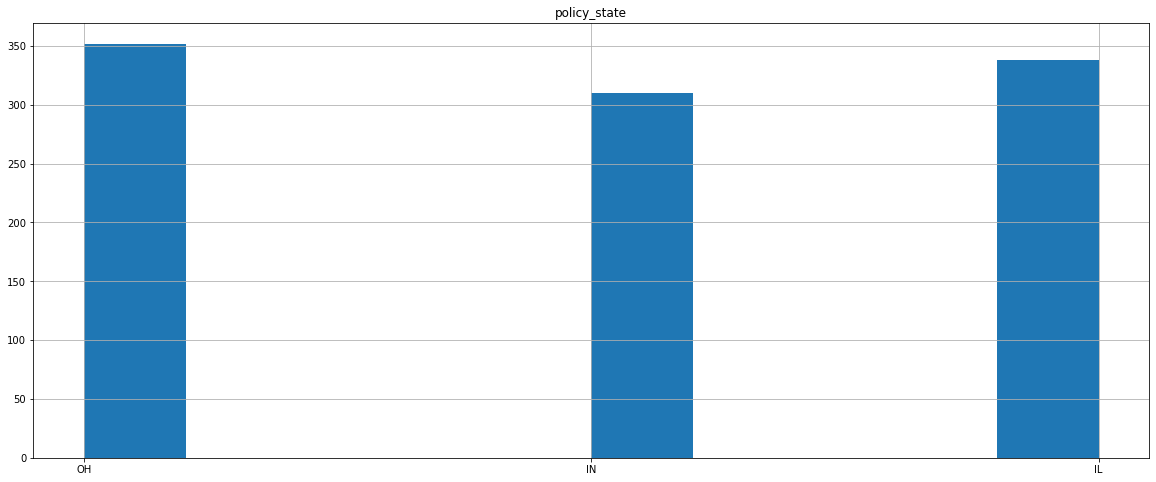

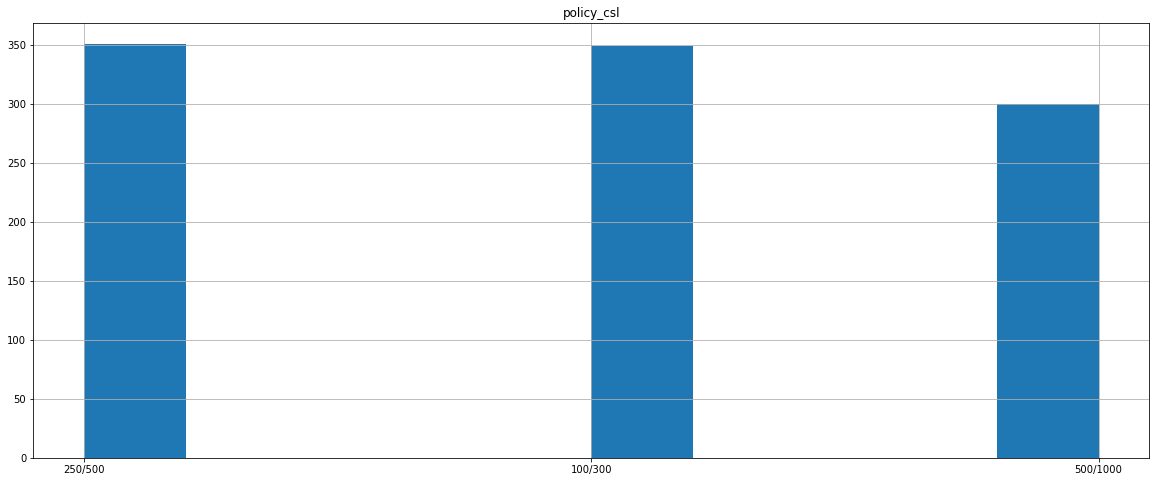

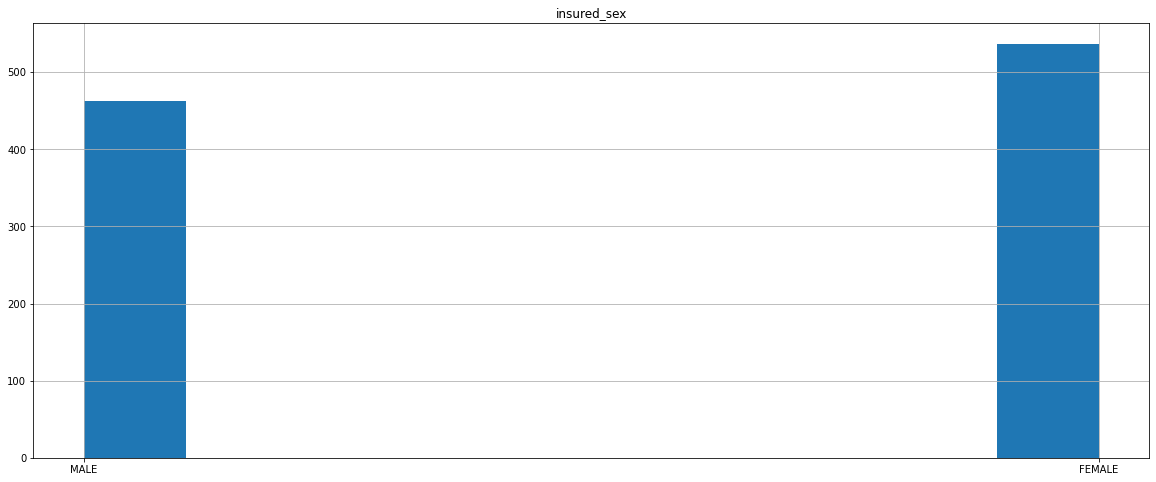

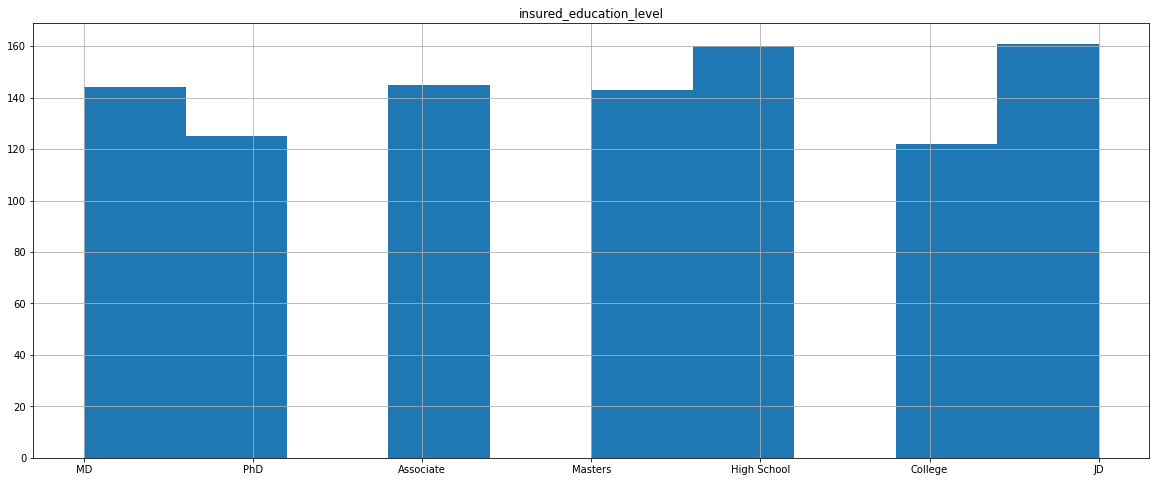

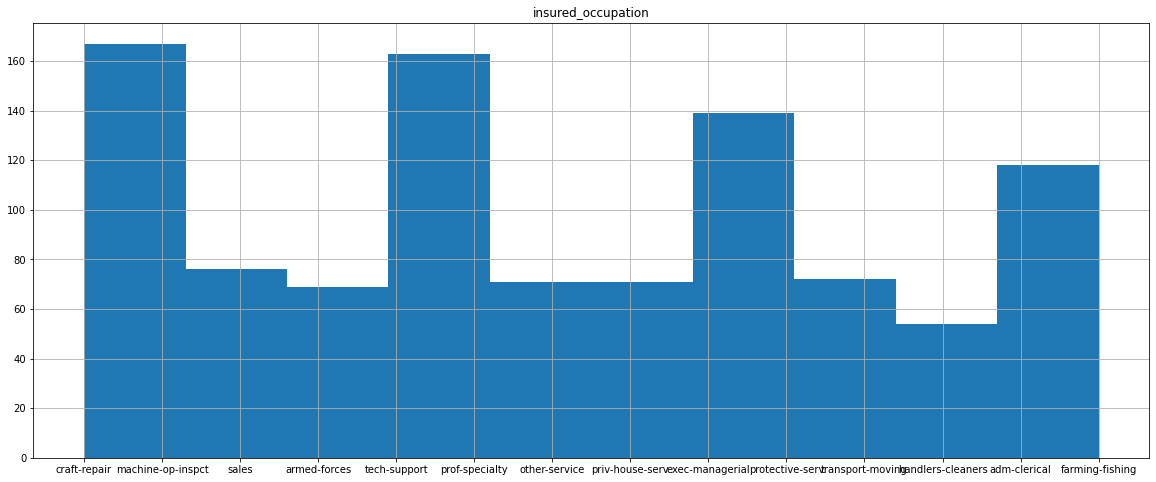

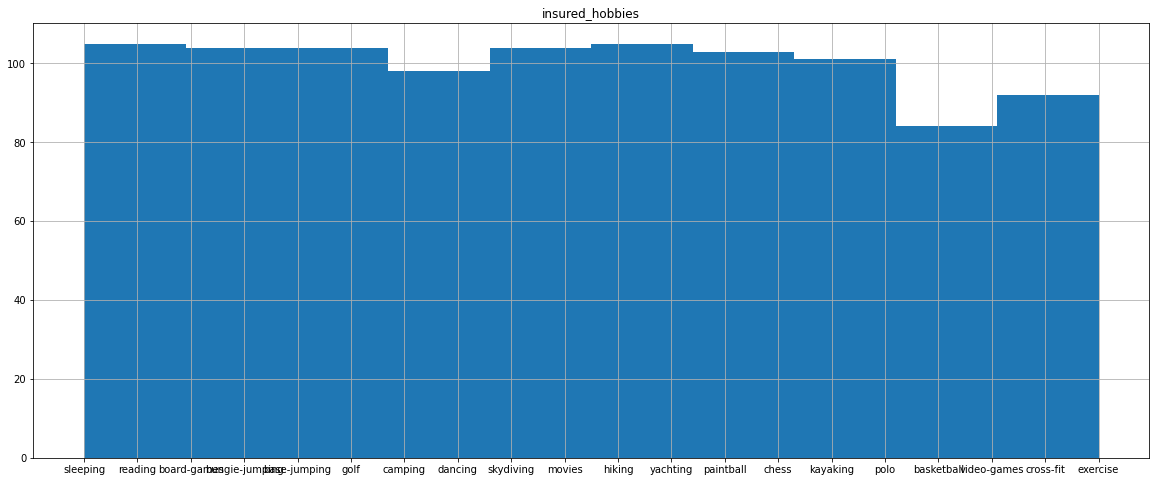

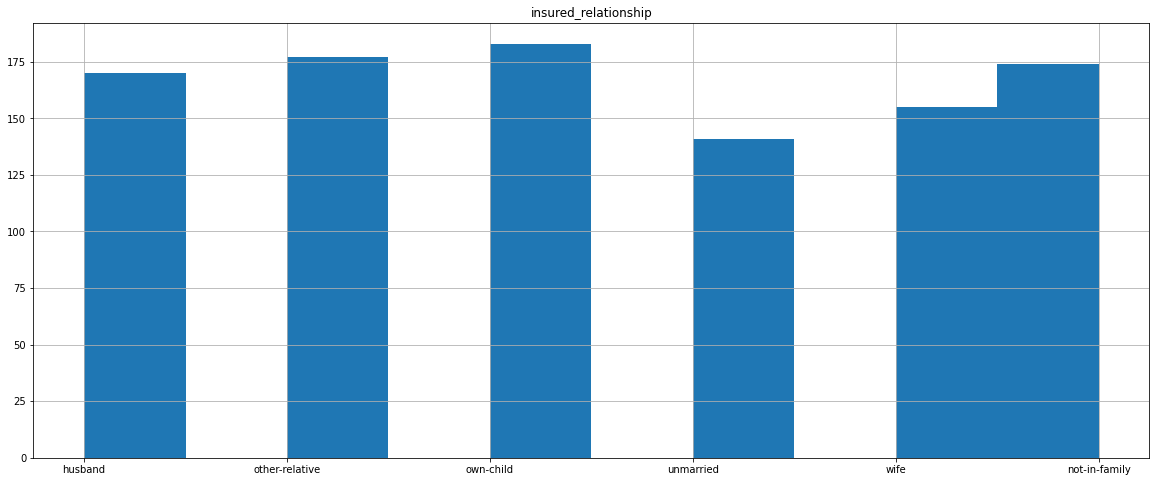

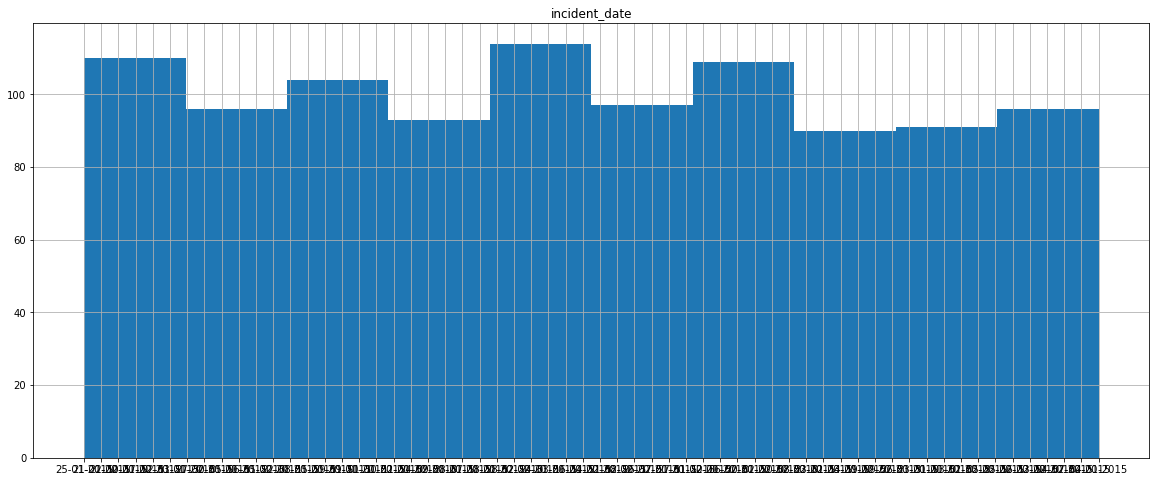

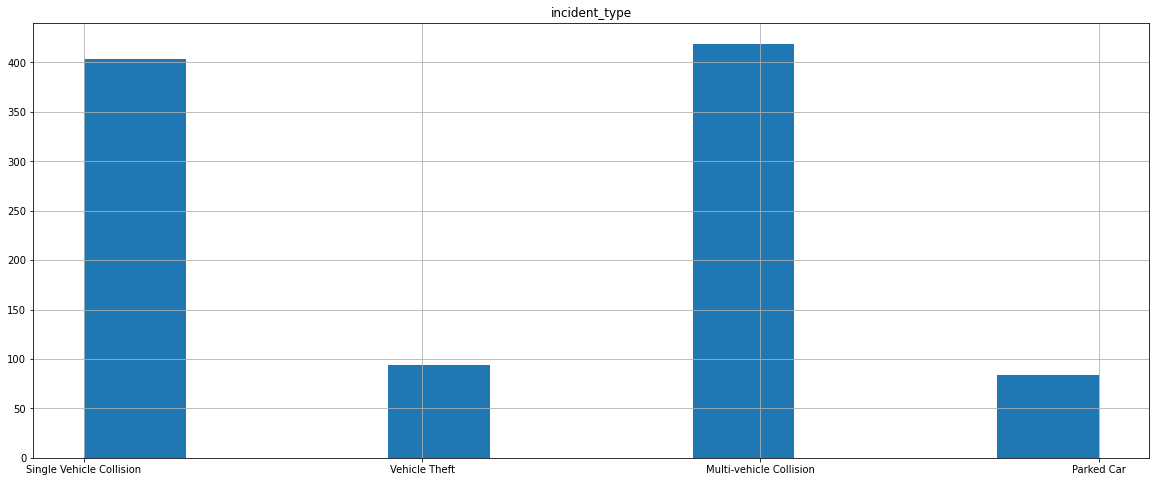

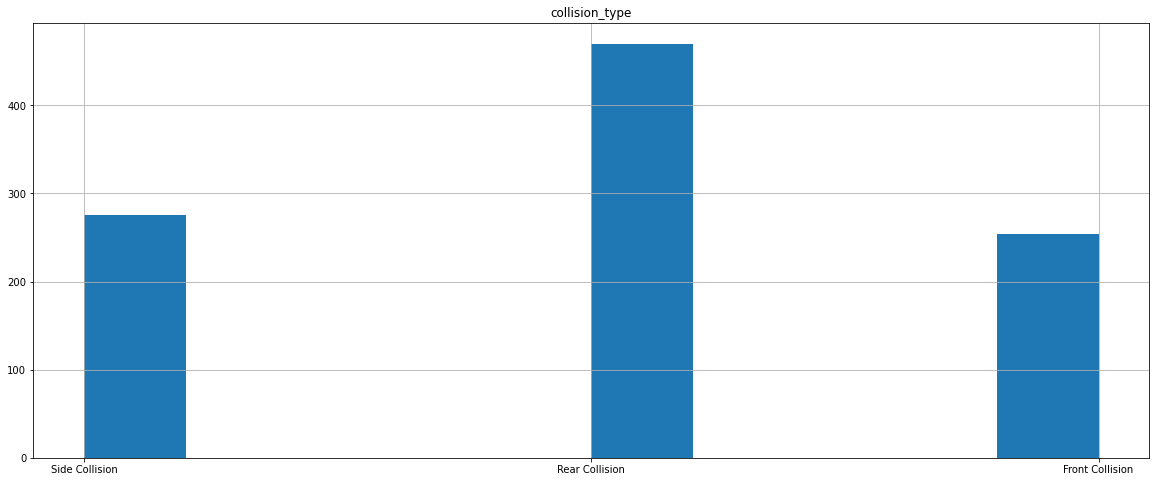

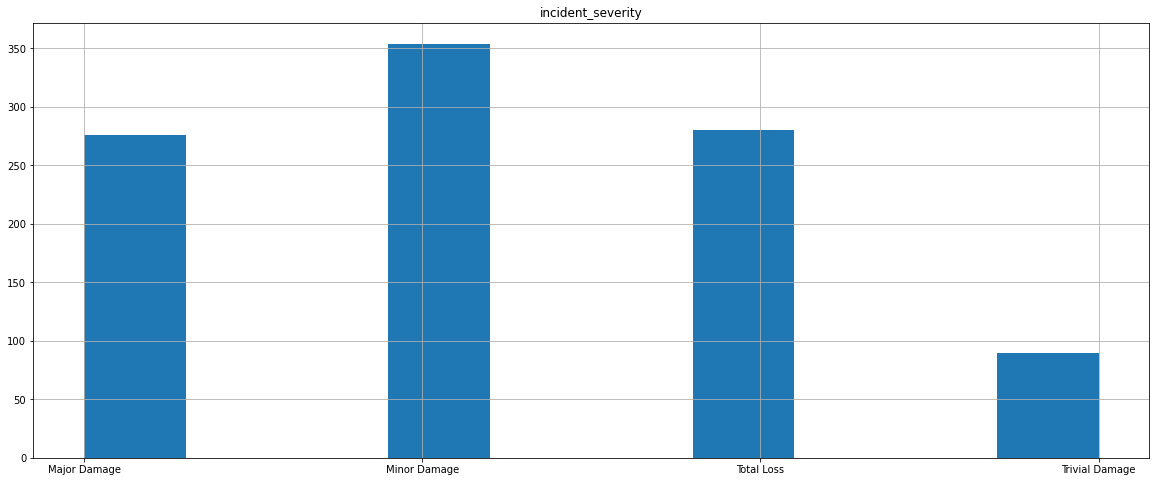

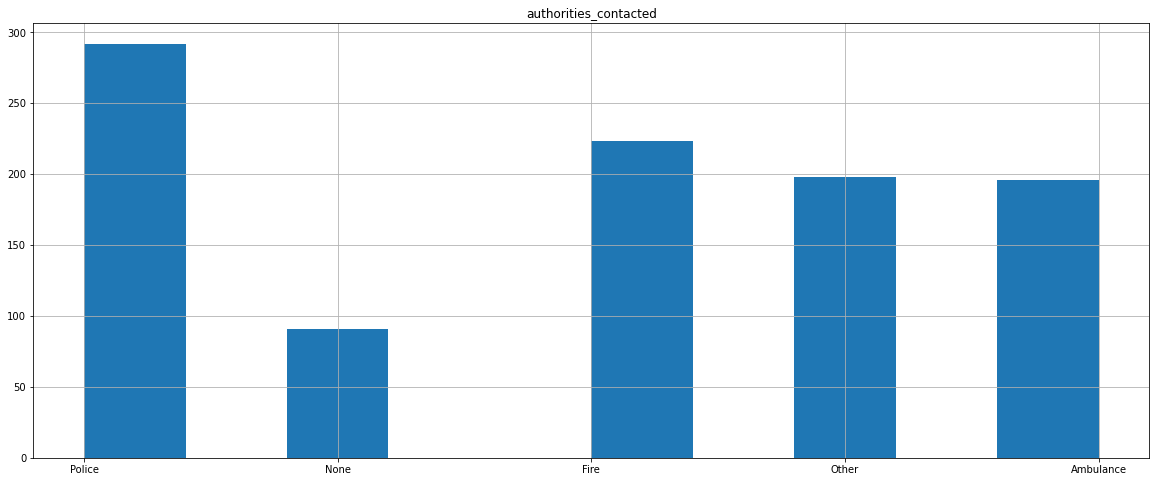

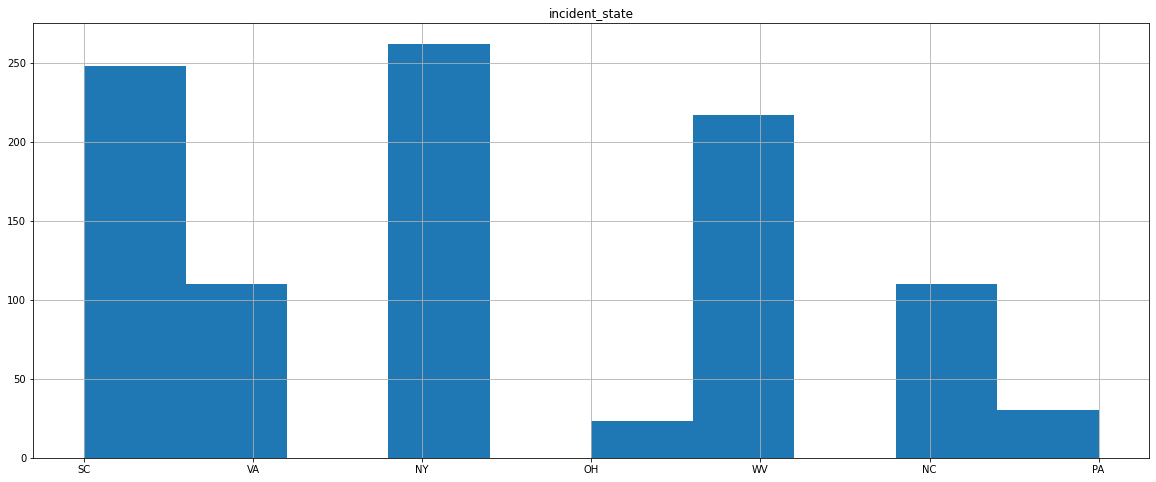

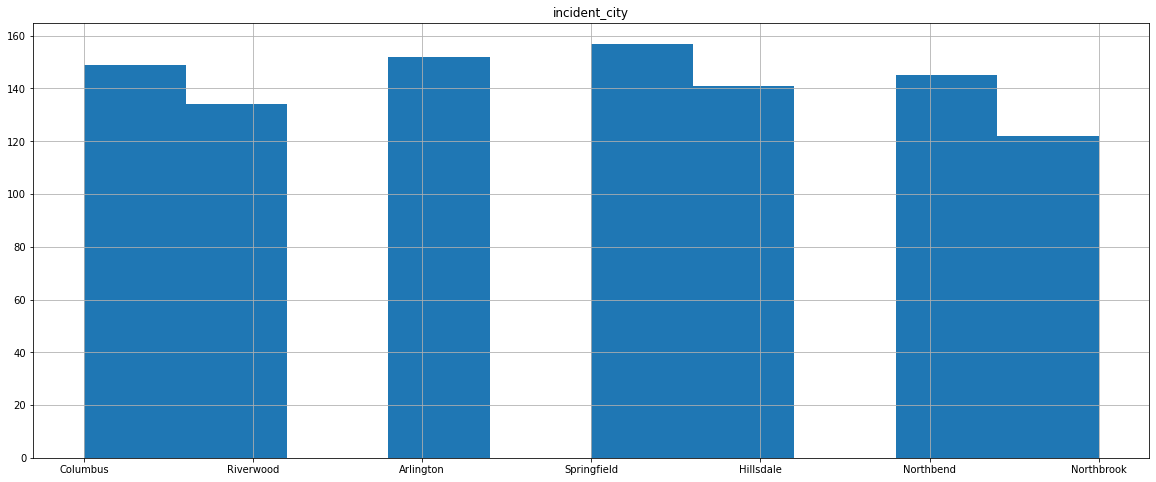

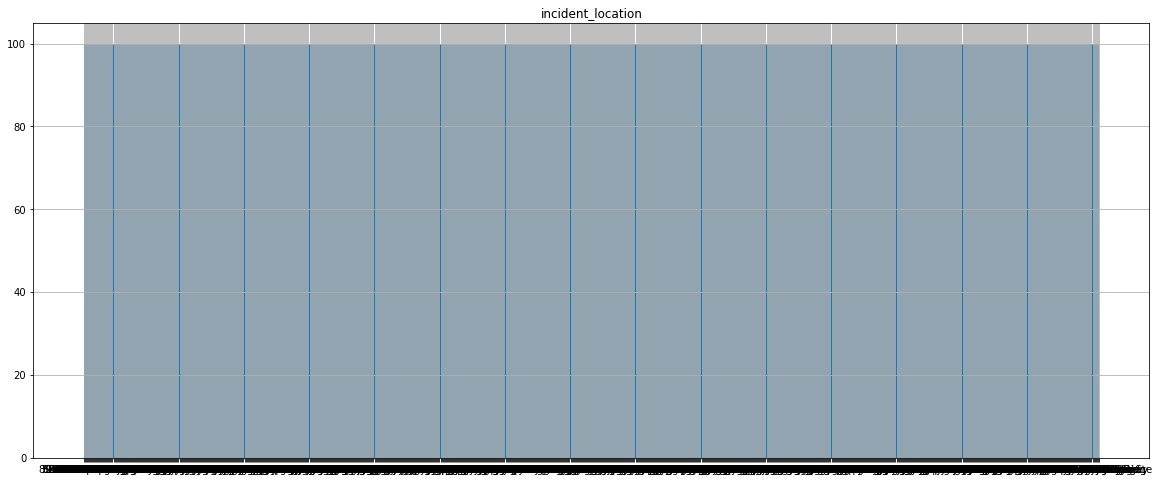

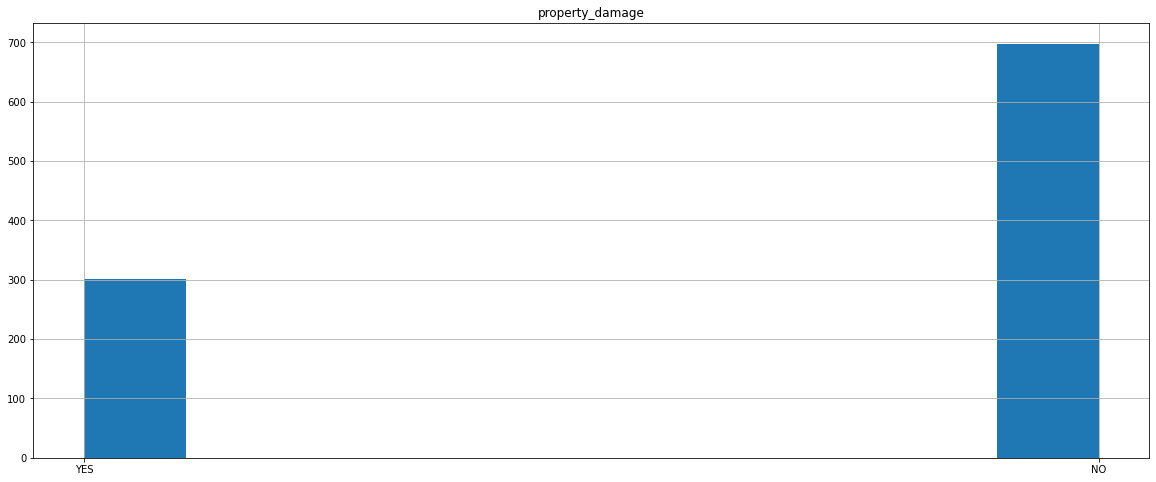

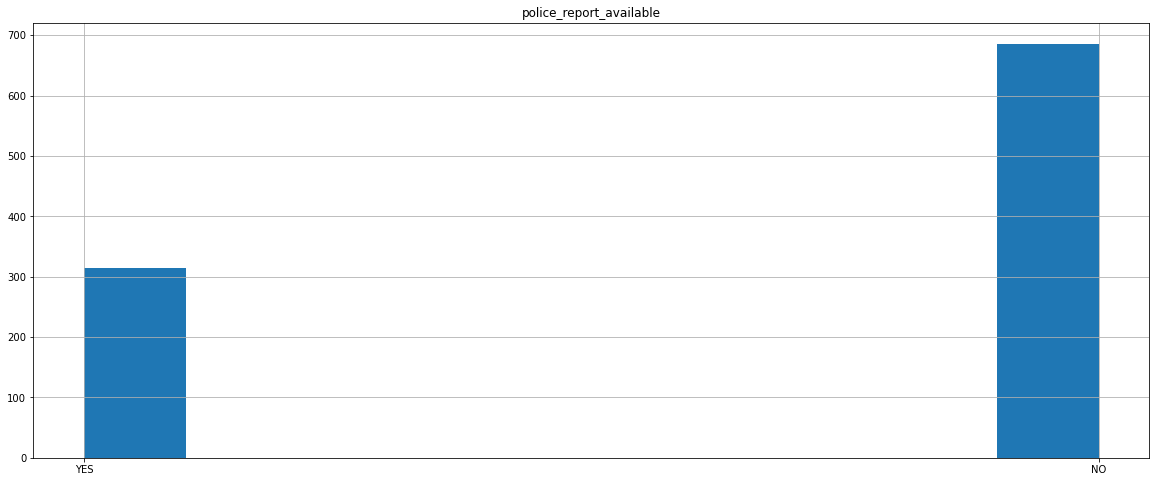

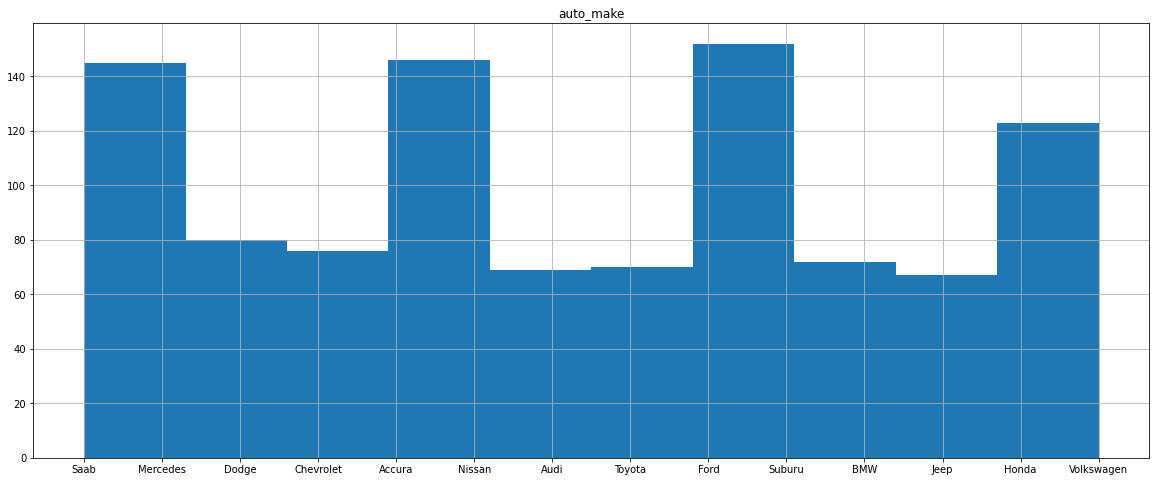

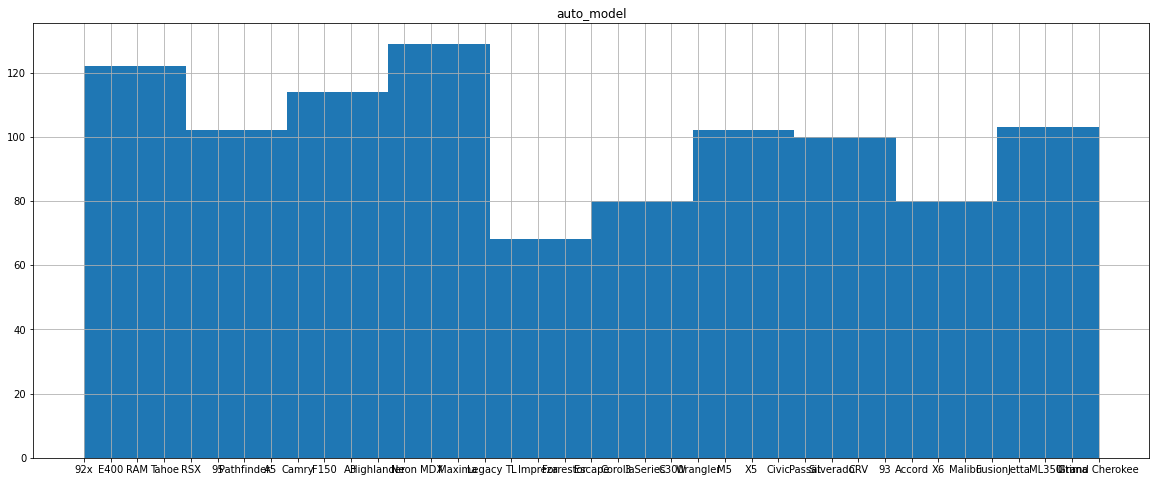

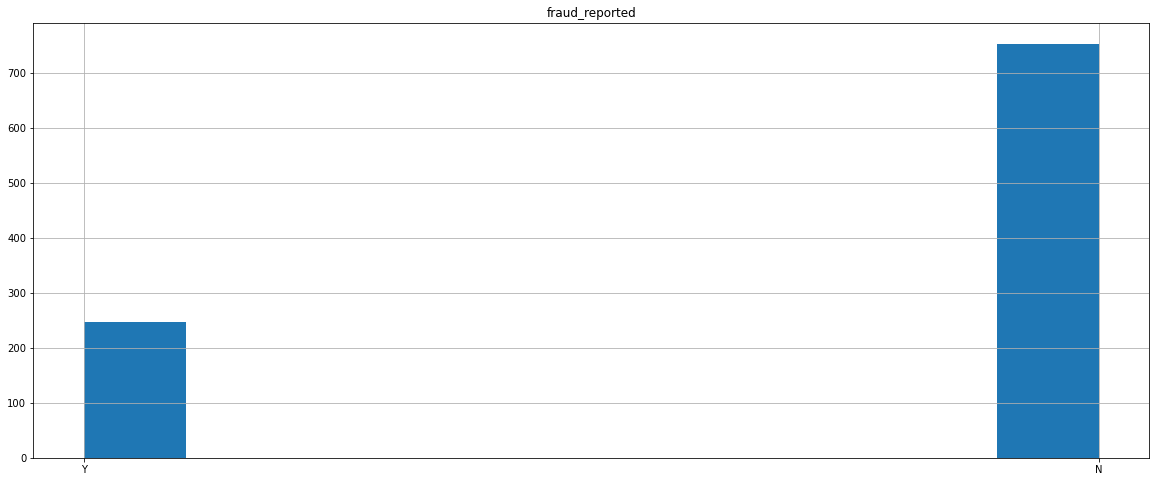

In [149]:
for i in cate_cols:                                 
    plt.figure(figsize = (20, 8))
    data[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [150]:
data.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


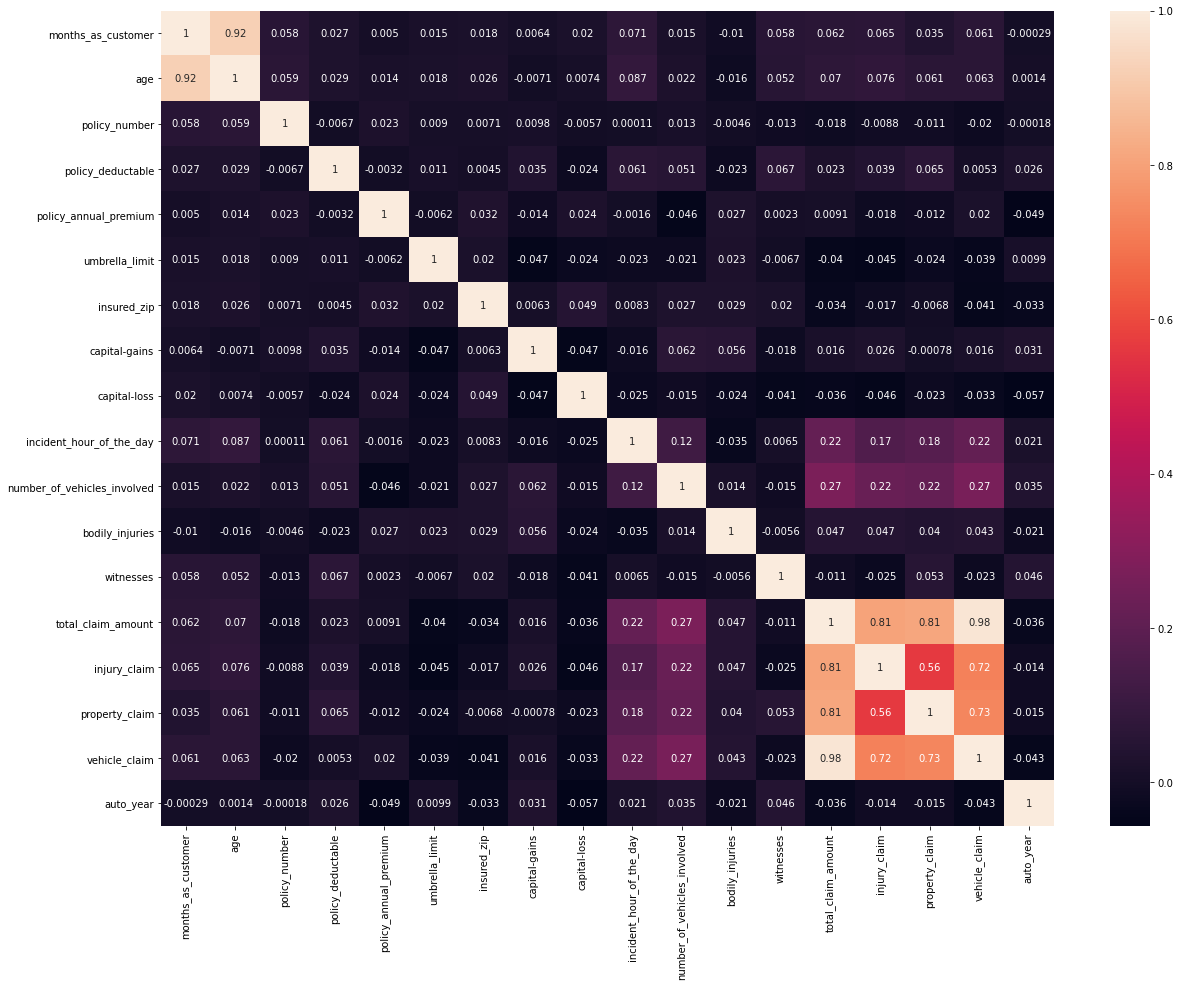

In [151]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(data.corr(), annot = True)
plt.show()

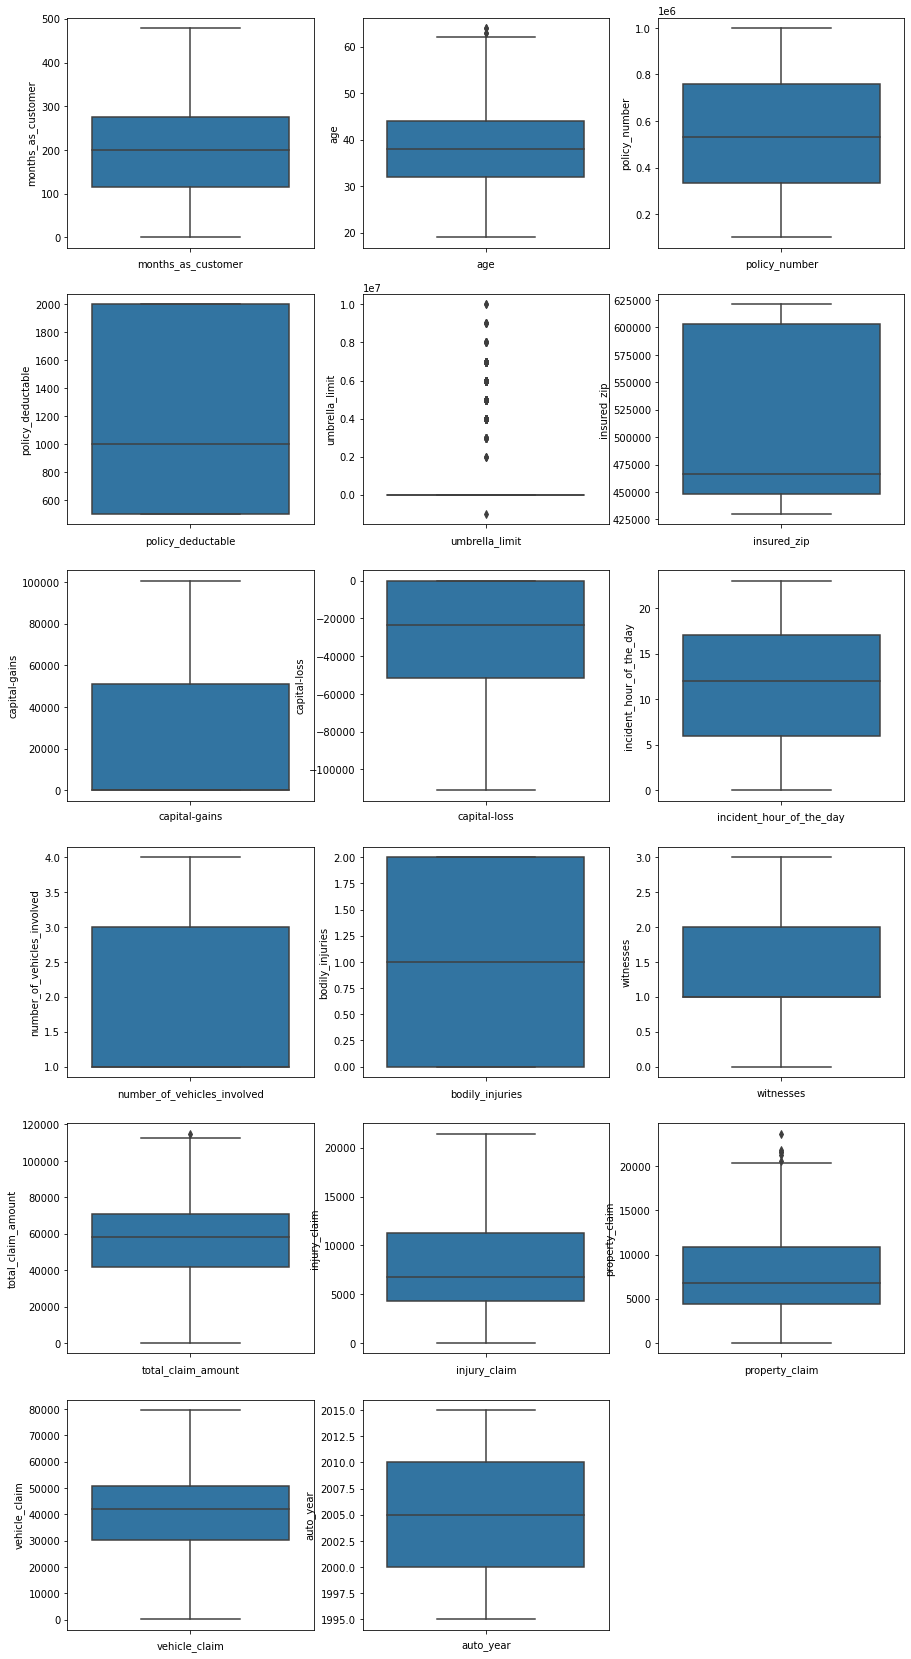

In [152]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in cont_cols:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [153]:
data.shape

(1000, 39)

In [154]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [155]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['age','umbrella_limit','property_claim']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

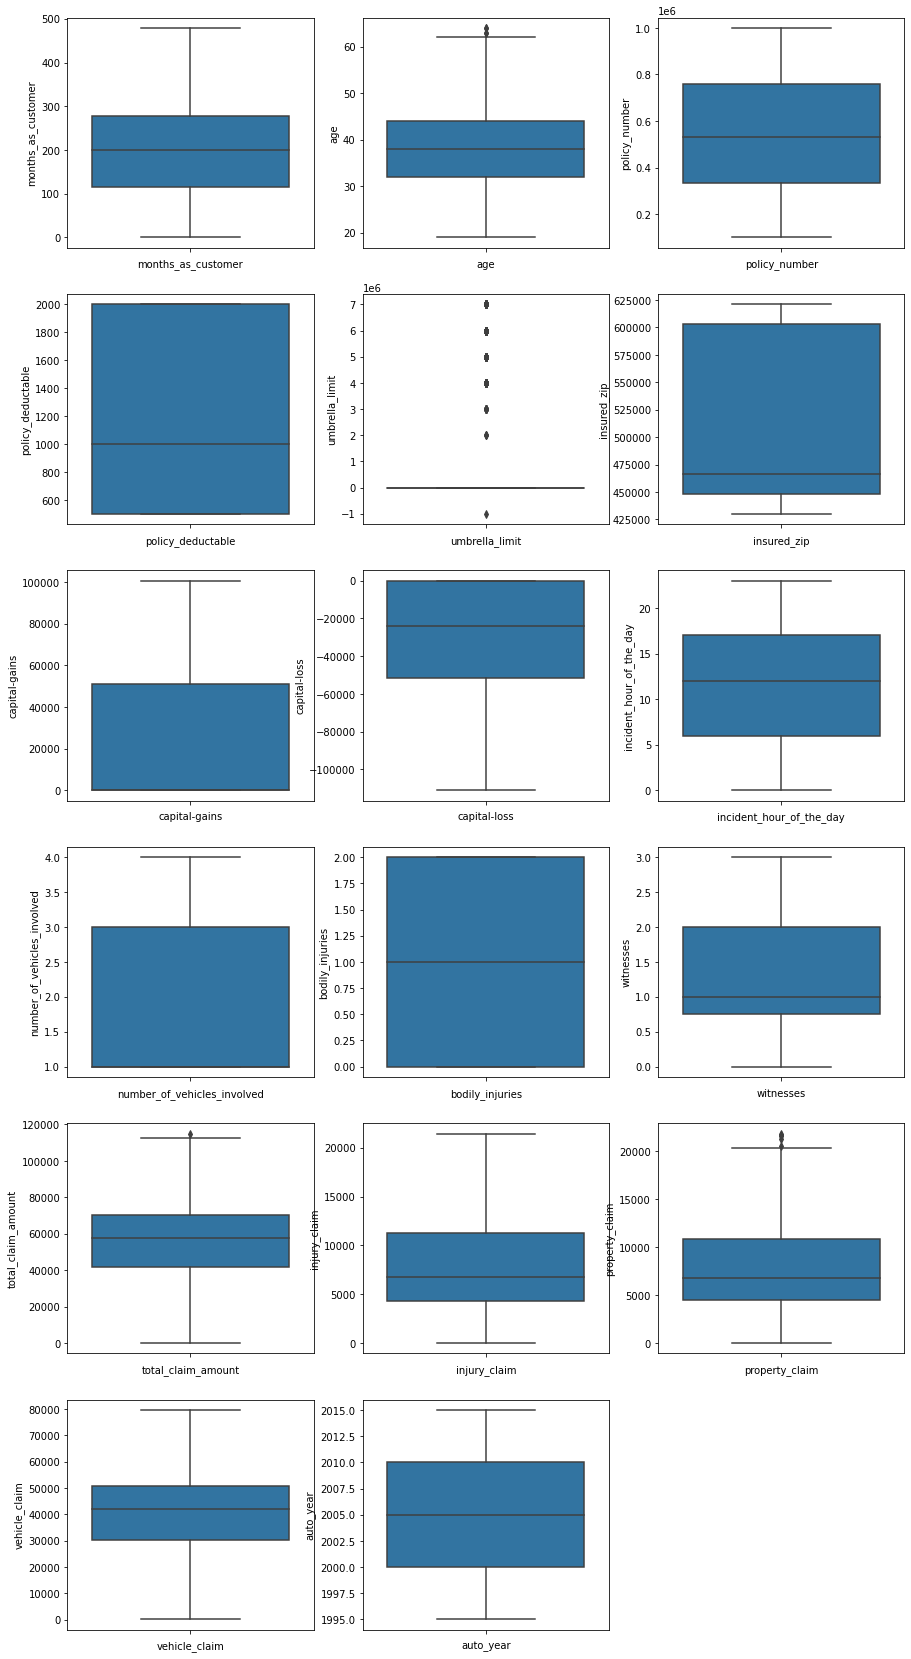

In [156]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in cont_cols:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [157]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['age','umbrella_limit','property_claim']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [158]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['age','umbrella_limit','property_claim']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

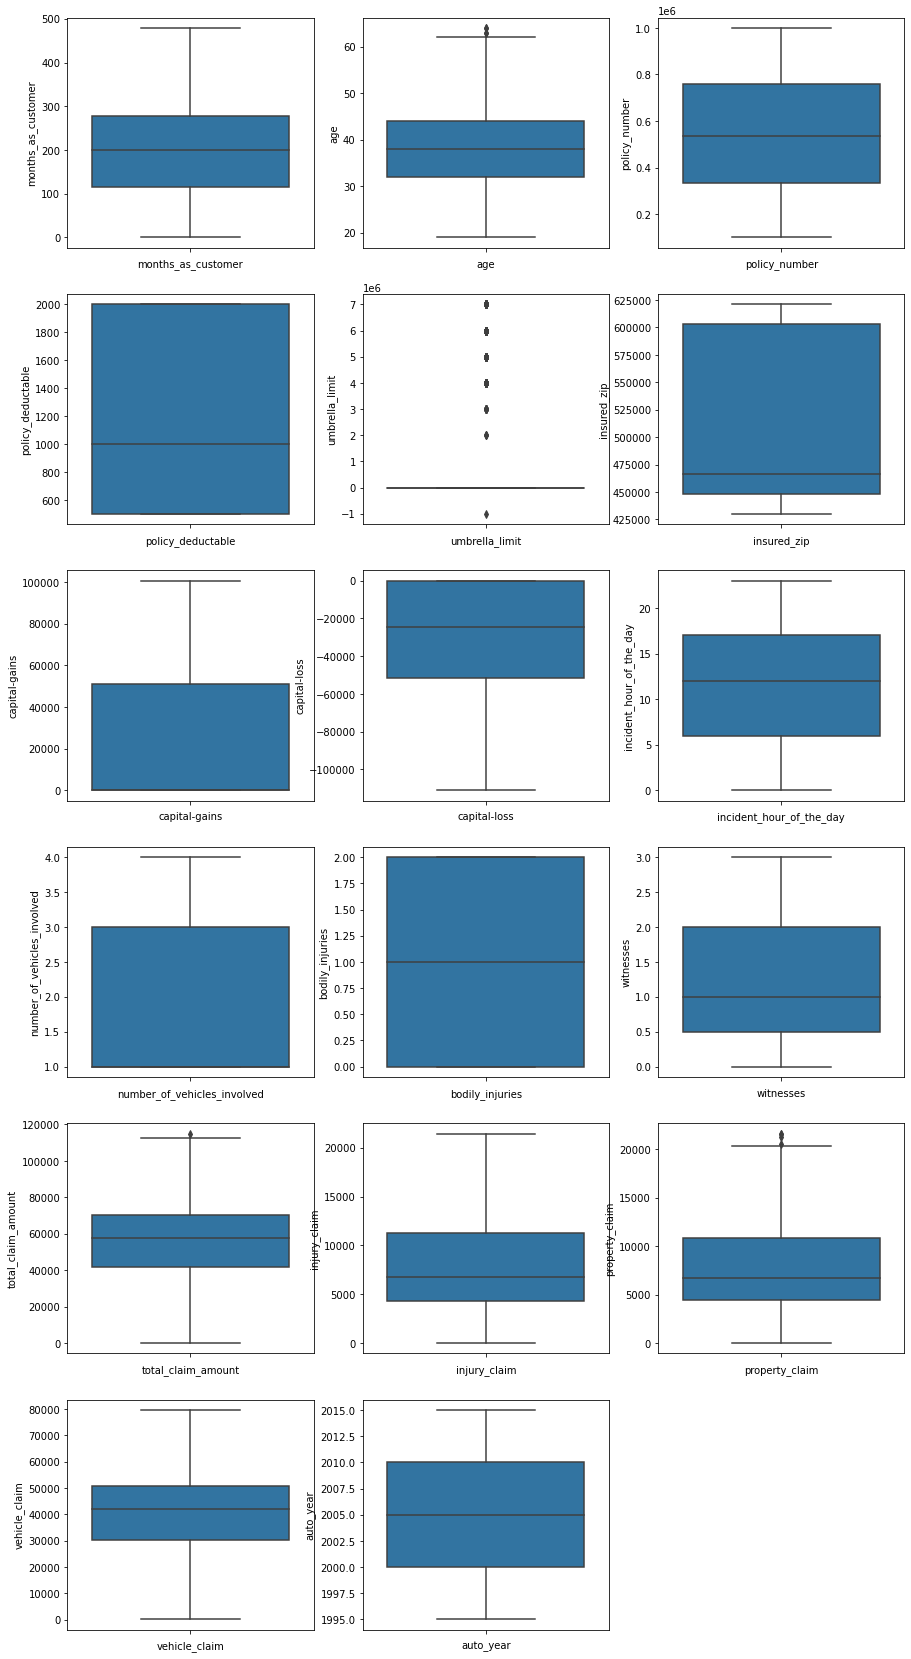

In [159]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in cont_cols:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [160]:
data.shape

(983, 39)

In [161]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(data[['age','umbrella_limit','property_claim']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

In [162]:
data.skew()

months_as_customer             0.367062
age                            0.480271
policy_number                  0.041462
policy_deductable              0.475197
policy_annual_premium          0.007590
umbrella_limit                 1.806345
insured_zip                    0.836554
capital-gains                  0.466842
capital-loss                  -0.385543
incident_hour_of_the_day      -0.031525
number_of_vehicles_involved    0.505944
bodily_injuries                0.009371
witnesses                      0.018718
total_claim_amount            -0.594456
injury_claim                   0.266142
property_claim                 0.343285
vehicle_claim                 -0.620708
auto_year                     -0.055275
dtype: float64

In [163]:
data['umbrella_limit']=np.log1p(data['umbrella_limit'])
data['insured_zip']=np.log1p(data['insured_zip'])
data['vehicle_claim']=np.log1p(data['vehicle_claim'])

In [196]:
s = (data.dtypes == 'object')
obj_cols = list(s[s].index)

print("Categorical variables:")
print(obj_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [197]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in obj_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [198]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int32
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [199]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [200]:
x = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [201]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 38)
Shape of x_test : (200, 38)
Shape of y_train : (800,)
Shape of y_test : (200,)


In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [203]:
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [204]:
LR = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
models = [LR, knn, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.71
[[142   1]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       143
           1       0.00      0.00      0.00        57

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.59       200

KNeighborsClassifier()
0.675
[[130  13]
 [ 52   5]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       143
           1       0.28      0.09      0.13        57

    accuracy                           0.68       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.59      0.68      0.61       200

RandomForestClassifier()
0.73
[[133  10]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       143
           1       0.57      0.23      0.32        57

    accuracy                

Among other models,RandomForestClassifier is having high accuracy

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [207]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [208]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [209]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.725
[[136   7]
 [ 48   9]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       143
           1       0.56      0.16      0.25        57

    accuracy                           0.73       200
   macro avg       0.65      0.55      0.54       200
weighted avg       0.69      0.72      0.67       200



In [210]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=0)  model is : 0.763


In [211]:
import pickle
pickle.dump(rfc1, open('insurance_fraud_detection', 'wb'))

In [212]:
# Loading model to compare the results
loaded = pickle.load(open('insurance_fraud_detection','rb'))

In [213]:
predrfc1 = rfc1.predict(x_test)

In [214]:
predrfc1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0])